![title.png](ML_04_title.png)

![title](ML_04_agenda.png)

In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")


## Regression Tasks in ML

### Motivation
Regression helps us predict **continuous values** like house prices, temperatures, or stock prices.

Practical cases where regression-based prediction models are useful:
1. Sales (demand) forecasting
2. Supply forecasting and supply chain optimization
3. Pricing strategies (including dynamic pricing)
4. Customer Lifetime Value (CLTV) calculation
5. Risk assessment and credit scoring


### Theory
A linear regression problem assumes, that observed data can be described using a linear function:
$ y = f(X) + \varepsilon $
Where:
- $ y $: target variable
- $ X $: input features
- $ f(X) $: function we try to learn
- $ \varepsilon $: error/noise


In [613]:
df = pd.read_csv("Housing.csv", index_col=None)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [614]:
def square_feet_to_square_meters(square_feet):
  """Converts square feet to square meters.

  Args:
    square_feet: The area in square feet.

  Returns:
    The area in square meters.
  """
  conversion_factor = 0.09290304
  square_meters = square_feet * conversion_factor
  return square_meters
df["area_m2"] = df.area.apply(square_feet_to_square_meters)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,689.340557
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,832.411238
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,925.314278
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,696.772800
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,689.340557


In [615]:
X = df.area_m2.to_numpy()
y = df.price.to_numpy()

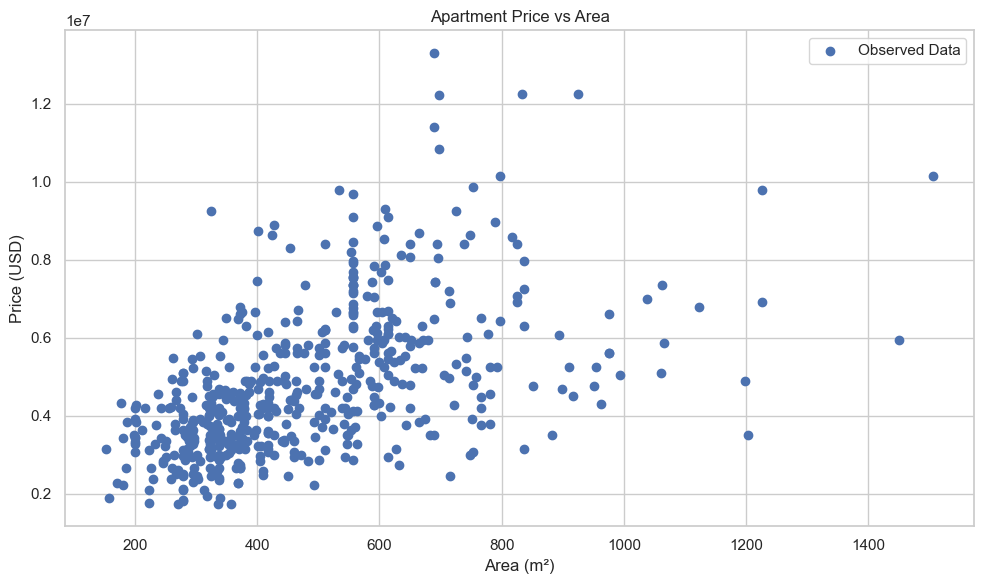

In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Observed Data")
plt.title("Apartment Price vs Area")
plt.xlabel("Area (m²)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## The Main Idea of Fitting a Line to Data

### Why Learn This?
Сore idea: **minimize error between predictions and actual data**.

### Theory
We fit a line:
$ \hat{y} = w_1 x + w_0 $

We would like to minimize Mean Squared Error:
$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

However, MSE is difficult to interpret, so for the purposes of this lecture, we will switch to another metric

### R² — Coefficient of Determination

**R²** (pronounced "R-squared") is a statistical measure that represents the **proportion of variance in the target variable** that is explained by the model.

---

#### Formula

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Where:
- $ SS_{res} = \sum (y_i - \hat{y}_i)^2 $ : Residual Sum of Squares
- $ SS_{tot} = \sum (y_i - \bar{y})^2 $: Total Sum of Squares


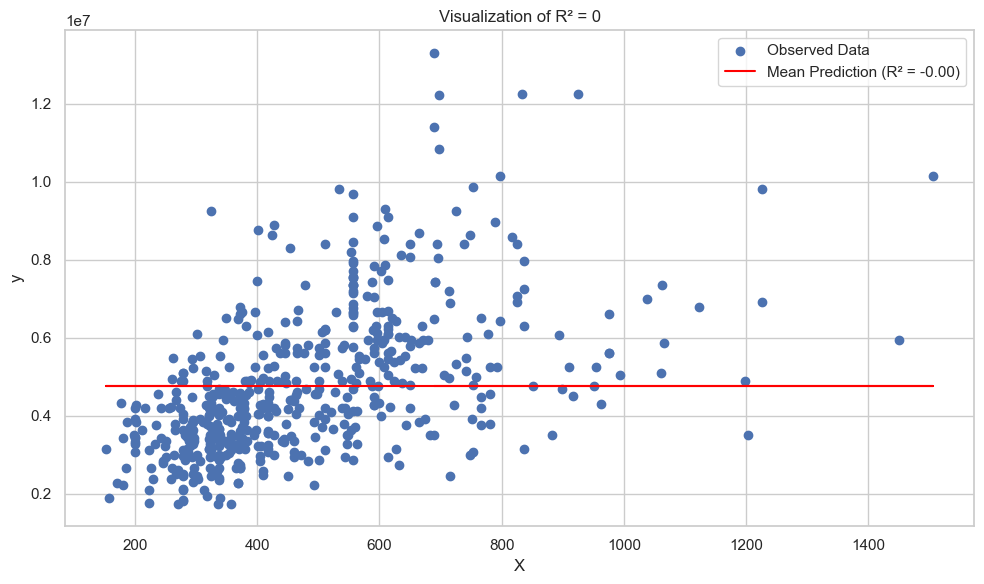

In [617]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# "Model" prediction: constant mean (R² = 0)
y_pred = np.full_like(y, fill_value=np.mean(y))

# Calculate R²
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Observed Data")
plt.plot(X, y_pred, color='red', label=f"Mean Prediction (R² = {r2:.2f})")
plt.title("Visualization of R² = 0")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation

- **R² = 1.0** → Perfect prediction (all variance explained)
- **R² = 0.0** → Model does no better than the mean
- **R² < 0.0** → Model is worse than a horizontal line at the mean

---

### When to Use

R² is most meaningful for **regression tasks** and when comparing models **on the same dataset**

Model 1:
  Intercept = 2000, Slope = 8500
  SSR = 1896678590455467.75
  MSE = 3480144202670.58
  R² = 0.0034
Model 2:
  Intercept = 1000, Slope = 9000
  SSR = 1830012074282497.25
  MSE = 3357820319784.40
  R² = 0.0385


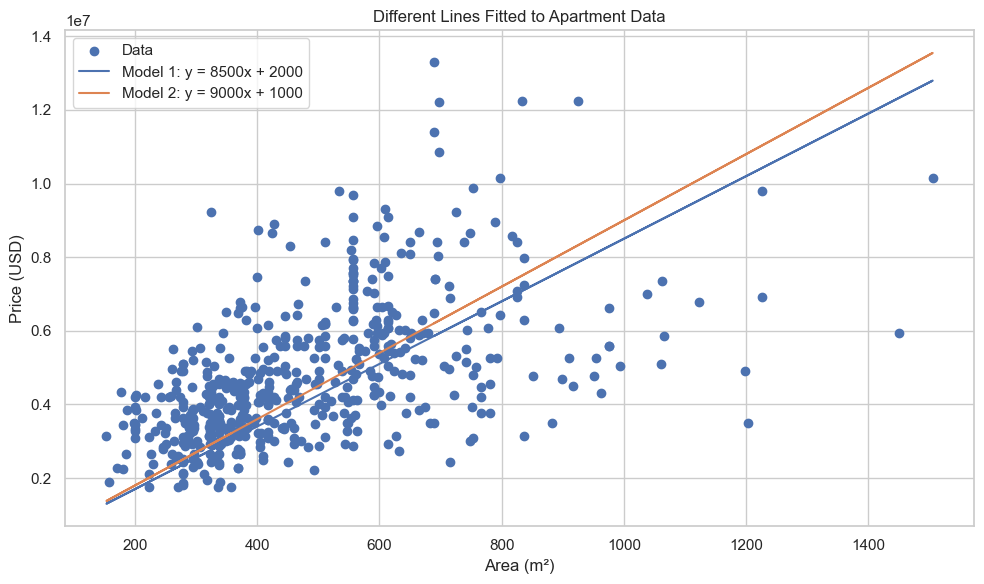

In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats

# Define two custom lines
line_params = {
    "Model 1": {"slope": 8500, "intercept": 2000},
    "Model 2": {"slope": 9000, "intercept": 1000}
}

# Compute predictions, SSR, R2
for name, params in line_params.items():
    y_pred = params["slope"] * X + params["intercept"]
    residuals = y - y_pred
    ssr = np.sum(residuals**2)
    mse = ssr / len(residuals)
    r2 = r2_score(y, y_pred)

    print(f"{name}:")
    print(f"  Intercept = {params['intercept']}, Slope = {params['slope']}")
    print(f"  SSR = {ssr:.2f}")
    print(f"  MSE = {mse:.2f}")
    print(f"  R² = {r2:.4f}")

# Plot with both lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data")


for name, params in line_params.items():
    y_line = params["slope"] * X + params["intercept"]
    plt.plot(X, y_line, label=f"{name}: y = {params['slope']}x + {params['intercept']}")

plt.title("Different Lines Fitted to Apartment Data")
plt.xlabel("Area (m²)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Linear Regression

### Why Learn This?
It's fast, interpretable, and is an effective baseline for a regression problem

### Theory
The optimal coefficients can be computed analytically:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\quad , \quad
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Linear Regression:
  Intercept = 2387308.4823964317, Slope = 4972.656376721183
  SSR = 1356429462008458.00
  MSE = 2488861398180.66
  R² = 0.2873


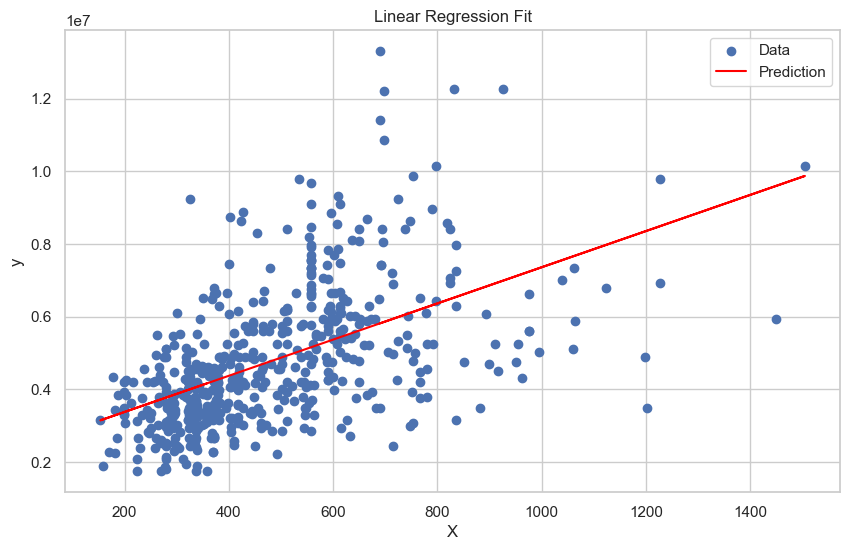

In [619]:
np.random.seed(0)

model = LinearRegression().fit(X.reshape(-1,1), y)
plt.figure(figsize=(10, 6))
plt.scatter(X.reshape(-1,1), y, label='Data')
plt.plot(X, model.predict(X.reshape(-1,1)), color='red', label='Prediction')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show

y_pred = model.predict(X.reshape(-1,1))
residuals = y - y_pred
ssr = np.sum(residuals**2)
mse = ssr / len(residuals)
r2 = r2_score(y, y_pred)
# print(model.coef_)
# print(model.intercept_)
y_pred_check = model.coef_[0] * X + model.intercept_
diff = y_pred - y_pred_check
# print(sum(diff))

print(f"{'Linear Regression:'}")
print(f"  Intercept = {model.intercept_}, Slope = {model.coef_[0]}")
print(f"  SSR = {ssr:.2f}")
print(f"  MSE = {mse:.2f}")
print(f"  R² = {r2:.4f}")


### Question time

## Gradient Descent

### Why Learn This?
**Numerical approach** for large-scale optimization. Most important algorithm in Machine Learning

### Update Rule
$ \theta := \theta - \alpha \cdot \nabla J(\theta) $


In [630]:
def gradient_descent(X_, y_, lr=0.0000037, epochs=3000000):
    y_true = y_.reshape(-1, 1)
    n = len(y_)
    X_b = np.c_[np.ones((n, 1)), X_] # the augmented design matrix
    theta = np.random.randn(2, 1)
    for _ in range(epochs):
        y_pred = X_b @ theta
        error = y_pred - y_true
        gradients = 2/n * X_b.T @ error # The gradient step
        theta -= lr * gradients
    return theta

theta = gradient_descent(X, y)

### What Does `X_b = np.c_[np.ones((n, 1)), X]` Mean?

This line is creating an augmented design matrix using NumPy. It adds a **column of 1s** to your feature matrix to represent the **intercept** (bias term) in the linear model.

---

#### The Code

```python
X_b = np.c_[np.ones((n, 1)), X]
```

#### What This Does
```np.ones((n, 1))```: creates a column vector of 1s (shape: n × 1)

`np.c_[]`: concatenates arrays column-wise

This adds the bias column to your feature matrix X


###  Why We Need It

The typical linear regression equation is:

$$
\hat{y} = \theta_0 + \theta_1 x
$$

To express this using matrix multiplication, we write:

$$
\hat{\mathbf{y}} = \mathbf{X}_b \boldsymbol{\theta}
$$

Where:

- $ \mathbf{X}_b = \begin{bmatrix} 1 & x_1 \\\\ 1 & x_2 \\\\ \vdots & \vdots \\\\ 1 & x_n \end{bmatrix} $
- $ \boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\\\ \theta_1 \end{bmatrix} $

The **column of 1s** allows the model to learn an **intercept** term ($ \theta_0 $).


In [631]:
y_pred = theta[1][0] * X + theta[0][0]
residuals = y - y_pred
ssr = np.sum(residuals**2)
mse = ssr / len(residuals)
r2 = r2_score(y, y_pred)
print(f"{'Approximated solution'}:")
print(f"Intercept: {theta[0][0]:.2f}, Slope: {theta[1][0]:.2f}")
print(f"  SSR = {ssr:.2f}")
print(f"  MSE = {mse:.2f}")
print(f"  R² = {r2:.4f}")

Approximated solution:
Intercept: 2302857.30, Slope: 5122.58
  SSR = 1357014560448370.50
  MSE = 2489934973299.76
  R² = 0.2870


### Understanding the Gradient Step in Linear Regression

To train a linear regression model using gradient descent, we need to compute how the **loss** changes with respect to the **model parameters** (intercept and slope). This change is captured by the **gradient**.

---

#### Objective

We want to minimize the **Mean Squared Error (MSE)** loss:

$$
J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2
\quad \text{where} \quad \hat{y}_i = \boldsymbol{\theta}^T \mathbf{x}_i
$$

In matrix notation:

- $\mathbf{X}_b$: the input matrix with a column of ones (for the intercept), shape $(m, n+1)$  
- $\boldsymbol{\theta}$: parameter vector, shape $(n+1, 1)$  
- $\mathbf{y}$: target vector, shape $(m, 1)$

Then:

$$
\hat{\mathbf{y}} = \mathbf{X}_b \boldsymbol{\theta} \\
J(\boldsymbol{\theta}) = \frac{1}{m} (\mathbf{X}_b \boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X}_b \boldsymbol{\theta} - \mathbf{y})
$$

---

#### Gradient of the Loss Function

To perform gradient descent, we compute the gradient of the loss:

$$
\nabla J(\boldsymbol{\theta}) = \frac{2}{m} \mathbf{X}_b^T (\mathbf{X}_b \boldsymbol{\theta} - \mathbf{y})
$$

This tells us the direction in which we should **adjust each parameter** to reduce the loss.

---

#### Code Correspondence

In NumPy, this is implemented as:

```python
y_pred = X_b @ theta                  # Predicted values
error = y_pred - y                    # Residuals (errors)
gradients = (2 / m) * X_b.T @ error  # Gradient of the loss
theta -= learning_rate * gradients   # Gradient descent update step
```

I very much encourage you to watch a beautiful explanation of gradient descent intuition by one of the most known scientists in the field of machine learning, Andrew Ng
https://www.youtube.com/watch?v=rIVLE3condE

![title](gradient_descent.png)

![title](gradient_descent_2.png)

## Why Do We Need Gradient Descent if We Already Have Linear Regression?

Linear regression has an elegant **closed-form solution** using the Normal Equation:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

So you might wonder: **Why introduce gradient descent at all?**

---

### Limitations of the Closed-Form Solution

1. **Computational Cost**  
   The matrix inversion step — $(\mathbf{X}^T \mathbf{X})^{-1}$ — has a computational complexity of **$O(n^3)$**, which becomes **prohibitively expensive for large datasets** (e.g., millions of features or samples).

2. **Memory Usage**  
   The full data matrix must be loaded into memory to compute the closed-form solution. This is infeasible for **very large or streaming datasets**.

3. **Numerical Stability**  
   If the features in $\mathbf{X}$ are highly correlated (multicollinearity), then $\mathbf{X}^T \mathbf{X}$ can become nearly singular (non-invertible), making the computation **unstable or impossible**.

---

### When Gradient Descent Shines

Gradient descent is an **iterative optimization method**. Instead of solving equations, it gradually updates the parameters to minimize the loss:

- Works efficiently with **large-scale and high-dimensional** data
- Can be applied to **nonlinear models** where no closed-form solution exists
- Naturally extends to **regularized models** (like Ridge, Lasso, ElasticNet)
- Forms the foundation of training **neural networks** and other complex ML models


### How to improve convergence of gradient descent? (Introduction to feature transformation)

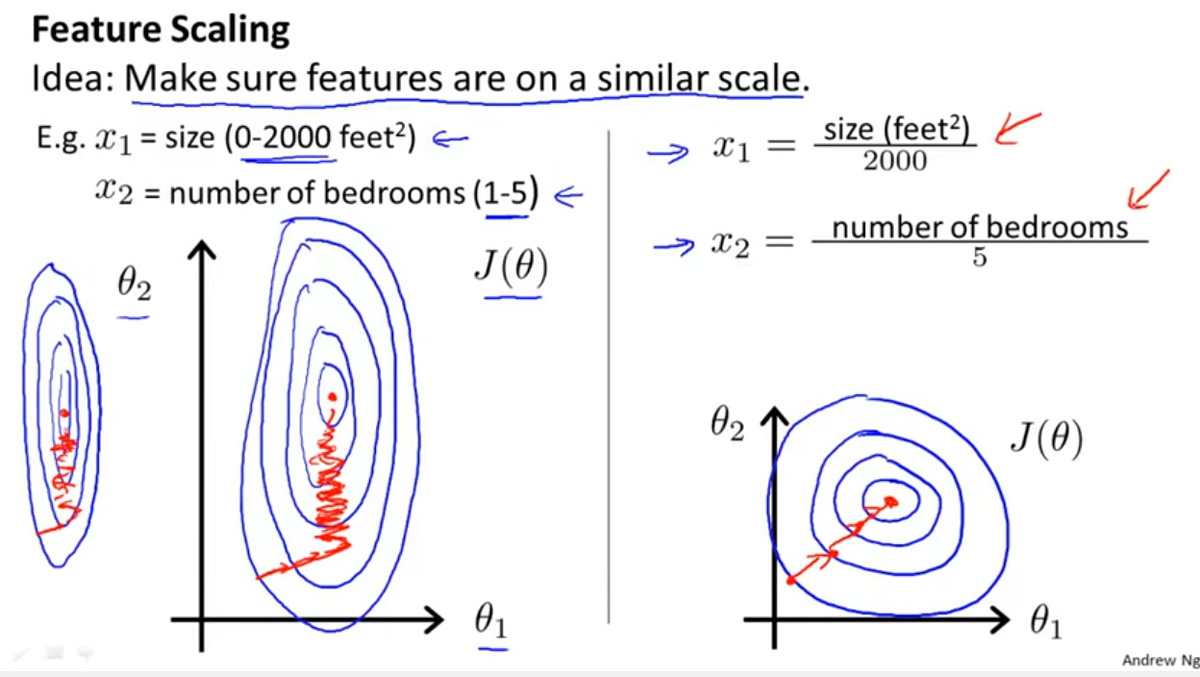

In [640]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1),y)
theta = gradient_descent(X_scaled, y, lr=0.5, epochs=5)

y_pred = theta[1][0] * X_scaled + theta[0][0]
residuals = y - y_pred
ssr = np.sum(residuals**2)
mse = ssr / len(residuals)
r2 = r2_score(y, y_pred)
print(f"{'Approximated solution'}:")
print(f"Intercept: {theta[0][0]:.2f}, Slope: {theta[1][0]:.2f}")
print(f"  SSR = {ssr:.2f}")
print(f"  MSE = {mse:.2f}")
print(f"  R² = {r2:.4f}")

Approximated solution:
Intercept: 4766729.25, Slope: 1001630.48
  SSR = 1335242804432756992.00
  MSE = 2449986797124325.00
  R² = 0.2873


### Question time

## Stochastic Gradient Descent

### Why?
Efficient for large datasets and online learning.

### SGD Rule
$ \theta := \theta - \alpha \cdot \nabla J_i(\theta) $

### Difference between gradient descent and stochastic gradient descent

- Gradient descent uses entire sample size for an epoch of training, SGD uses randomly selected batches. Sometimes people single out mini-batch gradient descent, which uses batches less than training sample size, but more than one (opposed to SGD, which often is referred to when mini-batch size is equal to 1). I use both definitions interchangibly, so does wikipedia

### When is SGD useful?
- Impossible to fit entire training dataset into memory (e.g. computer vision problems)
- Online learning: updates happen to model in real-time rather than retraining on new data

```
for _ in range(epochs):
    y_pred = X_b @ theta
    error = y_pred - y.reshape(-1, 1)
    gradients = 2/n * X_b.T @ error # The gradient step
    theta -= lr * gradients
```

``` 
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # shape (1, 2)
        yi = y[random_index:random_index+1]    # shape (1, 1)

        y_pred_i = xi @ theta
        error_i = y_pred_i - yi
        gradients_i = 2 * xi.T @ error_i  # shape (2, 1)

        theta -= learning_rate * gradients_i
```

## Multiple Linear Regression

### Why?
Capture interactions of multiple variables.

### Theory
$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p $$


In [401]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,689.340557
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,832.411238
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,925.314278
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,696.772800
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,689.340557


In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Fit linear regression model
X = df[["area_m2", "bedrooms"]]
y = df["price"]
model = LinearRegression().fit(X, y)

y_pred = model.predict(X)
residuals = df['price'] - y_pred
ssr = np.sum(residuals**2)
r2 = r2_score(df['price'], y_pred)

print(f"{name}:")
print(f"  Intercept = {model.intercept_}, Slope = {model.coef_}")
print(f"  SSR = {ssr:.2f}")
print(f"  R² = {r2:.4f}")

Model 2:
  Intercept = 391125.60987726506, Slope = [  4561.51420506 739565.94071523]
  SSR = 1198083120804859.00
  R² = 0.3705


In [437]:
df["sq_area"] = df.area_m2 ** 2
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_m2,sq_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,689.340557,475190.403249
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,832.411238,692908.469815
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,925.314278,856206.513811
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,696.772800,485492.334820
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,689.340557,475190.403249


In [436]:
X = df[["sq_area", "area_m2"]].to_numpy()

print(X.shape)

model = LinearRegression().fit(X, y)
# plt.figure(figsize=(10, 6))
# plt.scatter(X.reshape(-1,1), y, label='Data')
# plt.plot(X, model.predict(X.reshape(-1,1)), color='red', label='Prediction')
# plt.title("Linear Regression Fit")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.legend()
# plt.show

y_pred = model.predict(X)
residuals = y - y_pred
ssr = np.sum(residuals**2)
mse = ssr / len(residuals)
r2 = r2_score(y, y_pred)
# print(model.coef_)
# print(model.intercept_)
y_pred_check = np.sum(model.coef_[0] * X) + model.intercept_
diff = y_pred - y_pred_check
# print(sum(diff))

print(f"{'Linear Regression:'}")
print(f"  Intercept = {model.intercept_}, Slope = {model.coef_[0]}")
print(f"  SSR = {ssr:.2f}")
print(f"  MSE = {mse:.2f}")
print(f"  R² = {r2:.4f}")

(545, 2)
Linear Regression:
  Intercept = 795440.7576065846, Slope = -5.047462113202472
  SSR = 1288329885267143.25
  MSE = 2363908046361.73
  R² = 0.3231


## Overfitting and Generalization

### Why?
Avoid models that memorize data (or hallucinate patterns) instead of learning (or recognizing them)

- Underfitting: High bias
- Overfitting: High variance


In [641]:
# df_sorted = df.sort_values(by='area_m2').reset_index(drop=True)
df_sorted = df.sort_values(by='area_m2').reset_index(drop=True)

# Withhold top 15% of X values for testing
split_idx = int(len(df_sorted) * 0.85)

X_train = df_sorted.loc[:split_idx - 1, ['area_m2']]
y_train = df_sorted.loc[:split_idx - 1, 'price']
X_test = df_sorted.loc[split_idx:, ['area_m2']]
y_test = df_sorted.loc[split_idx:, 'price']

(463, 1)
(463,)
Poly Regression of degree 1:
  SSR = 818107581676519.25
  MSE = 1766971018739.78
  R² = 0.3116
Poly Regression of degree 2:
  SSR = 803629549723124.00
  MSE = 1735700971324.24
  R² = 0.3238
Poly Regression of degree 12:
  SSR = 788893210466302.62
  MSE = 1703873024765.23
  R² = 0.3362


/opt/homebrew/anaconda3/envs/regression/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/regression/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/regression/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


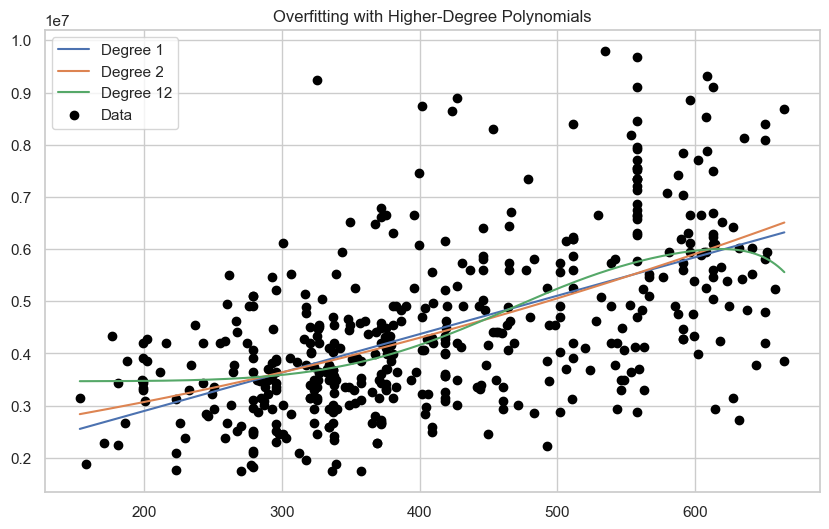

In [642]:
print(X_train.shape)
print(y_train.shape)
# X = np.linspace(0, 1, 30).reshape(-1, 1)
# y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.figure(figsize=(10, 6))
models = list()
degrees = [1,2,12]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    X_plot = np.linspace(X_train.min(), X_train.max(), len(y_train)).reshape(-1, 1)
    y_pred = model.predict(X_plot)
    residuals = y_train - y_pred
    ssr = np.sum(residuals**2)
    mse = ssr / len(residuals)
    r2 = r2_score(y_train, y_pred)
    print(f"Poly Regression of degree {degree}:")
    print(f"  SSR = {ssr:.2f}")
    print(f"  MSE = {mse:.2f}")
    print(f"  R² = {r2:.4f}")
    plt.plot(X_plot, y_pred, label=f"Degree {degree}")
    models.append(model)
    

plt.scatter(X_train, y_train, color='black', label="Data")
plt.legend()
plt.title("Overfitting with Higher-Degree Polynomials")
plt.show()

Poly Regression of degree 1:
  SSR = 705177034372183.62
  MSE = 8599719931368.09
  R² = -0.5243
Poly Regression of degree 2:
  SSR = 1177317992918722.50
  MSE = 14357536499008.81
  R² = -1.5449
Poly Regression of degree 12:
  SSR = 10052668956916362936057856.00
  MSE = 122593523864833701707776.00
  R² = -21729841634.0816


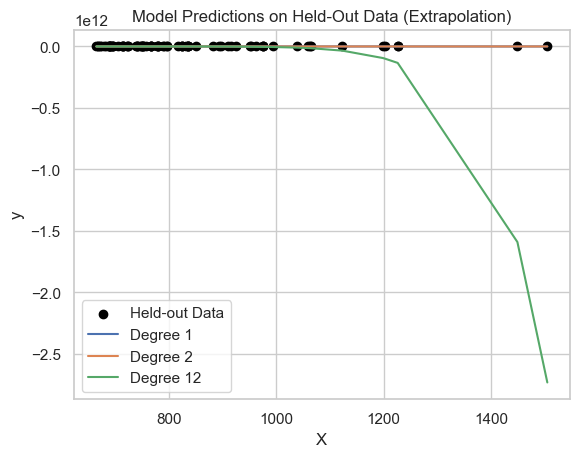

In [643]:
plt.scatter(X_test, y_test, color='black', label='Held-out Data')
for model, degree in zip(models, degrees):
    y_pred_test = model.predict(X_test)
    residuals = y_test - y_pred_test
    ssr = np.sum(residuals**2)
    mse = ssr / len(residuals)
    r2 = r2_score(y_test, y_pred_test)
    print(f"Poly Regression of degree {degree}:")
    print(f"  SSR = {ssr:.2f}")
    print(f"  MSE = {mse:.2f}")
    print(f"  R² = {r2:.4f}")
    plt.plot(X_test, y_pred_test, label=f'Degree {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions on Held-Out Data (Extrapolation)')
plt.legend()
plt.grid(True)
plt.show()

### Question time

## Assumptions of Linear Regression

For linear regression to provide reliable and interpretable results, five **assumptions** must hold:

### 1. **Linearity**
The relationship between the independent variables and the target is **linear**.

- Mathematically:  
  $$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon $$

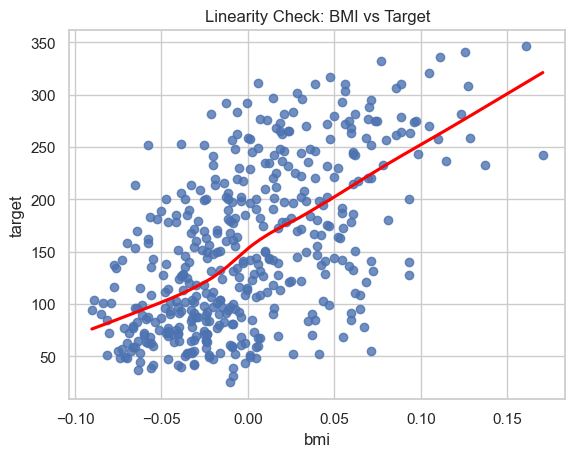

In [588]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd

# Load data
X, y = load_diabetes(return_X_y=True)
df = pd.DataFrame(X, columns=load_diabetes().feature_names)
df['target'] = y

# Scatter plot for one feature
sns.regplot(x=df['bmi'], y=df['target'], lowess=True, line_kws={'color': 'red'})
plt.title('Linearity Check: BMI vs Target')
plt.show()


### 2. **Independence**
The residuals (errors) are **independent** of each other.

- Especially important for time series data (check for autocorrelation).

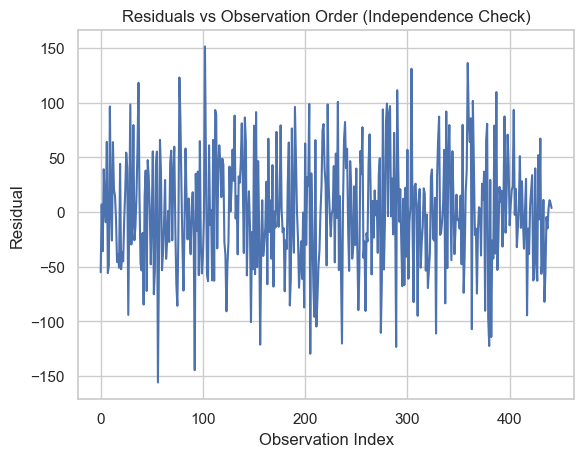

In [590]:
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt

X_const = add_constant(X)
model = OLS(y, X_const).fit()
residuals = model.resid

plt.plot(residuals)
plt.title("Residuals vs Observation Order (Independence Check)")
plt.xlabel("Observation Index")
plt.ylabel("Residual")
plt.show()




### 3. **Homoscedasticity**
The residuals have **constant variance** across all levels of the independent variables.

- Plotting residuals vs. predicted values should show no pattern.


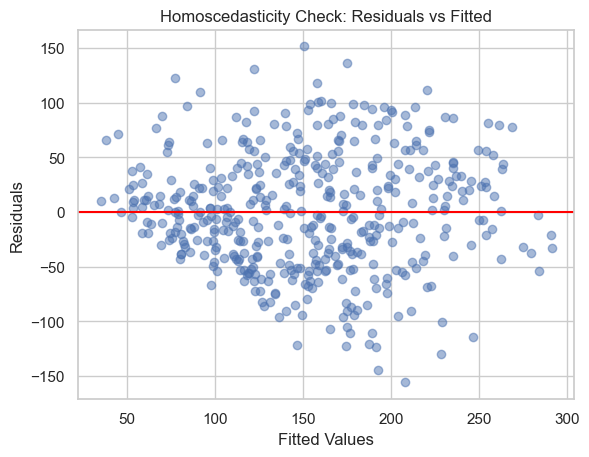

In [592]:
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title("Homoscedasticity Check: Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


### 4. **Normality of Residuals**
The residuals should be **normally distributed** (especially important for inference: confidence intervals, p-values).

- Check with a histogram or Q-Q plot of residuals.


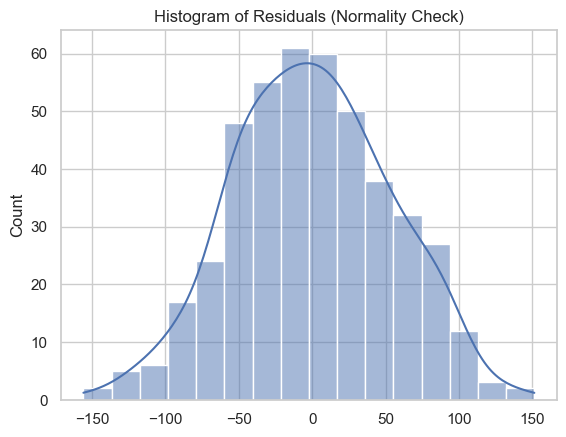

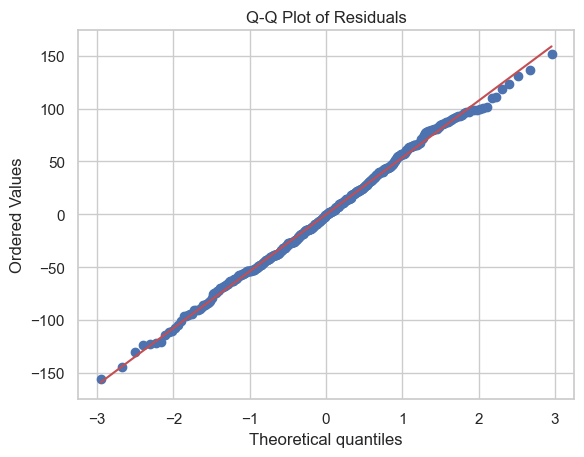

In [586]:
import scipy.stats as stats
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

# Or Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


### 5. **No Multicollinearity** (for multiple regression)
Independent variables are not **highly correlated** with each other.

- Detect using correlation matrices or Variance Inflation Factor (VIF).
VIF > 5 (or 10) indicates multicollinearity.

In [595]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(columns='target').columns
vif_data["VIF"] = [variance_inflation_factor(X_const, i + 1) for i in range(X.shape[1])]

print(vif_data)


  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


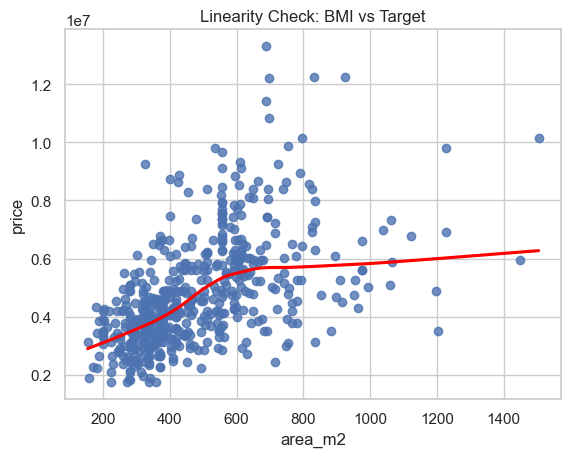

In [601]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import pandas as pd

# Load data
df = pd.read_csv("Housing.csv", index_col=None)
df["area_m2"] = df.area.apply(square_feet_to_square_meters)
X = df[["area_m2", "bedrooms",	"bathrooms", "stories", "parking"]].to_numpy()
y = df.price.to_numpy()

# Scatter plot for one feature
sns.regplot(x=df['area_m2'], y=df['price'], lowess=True, line_kws={'color': 'red'})
plt.title('Linearity Check: BMI vs Target')
plt.show()

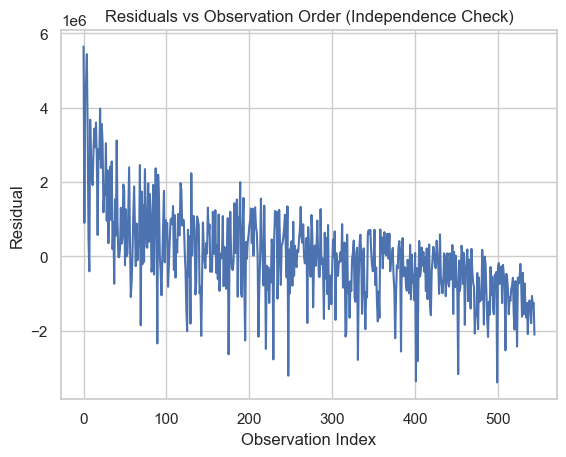

In [602]:
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt

X_const = add_constant(X)
model = OLS(y, X_const).fit()
residuals = model.resid

plt.plot(residuals)
plt.title("Residuals vs Observation Order (Independence Check)")
plt.xlabel("Observation Index")
plt.ylabel("Residual")
plt.show()

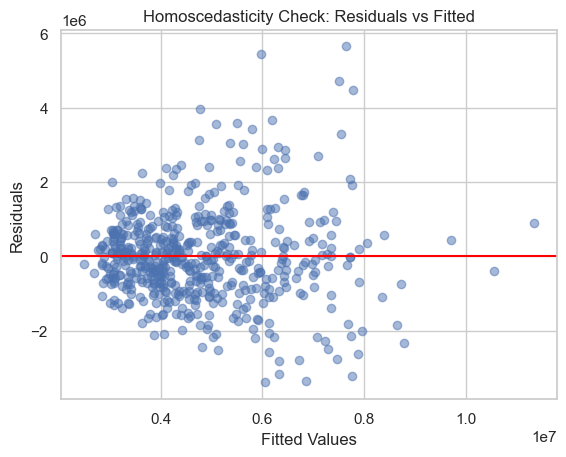

In [603]:
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title("Homoscedasticity Check: Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


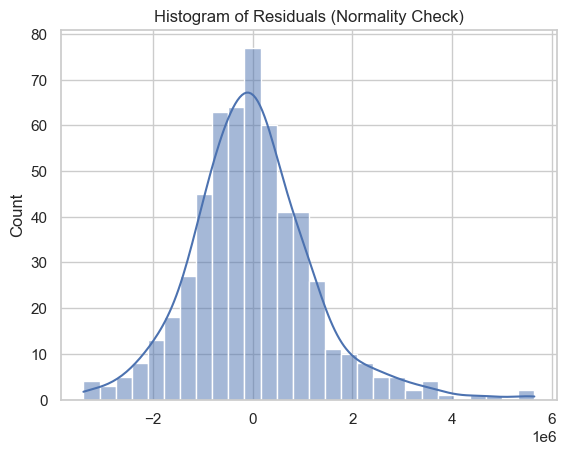

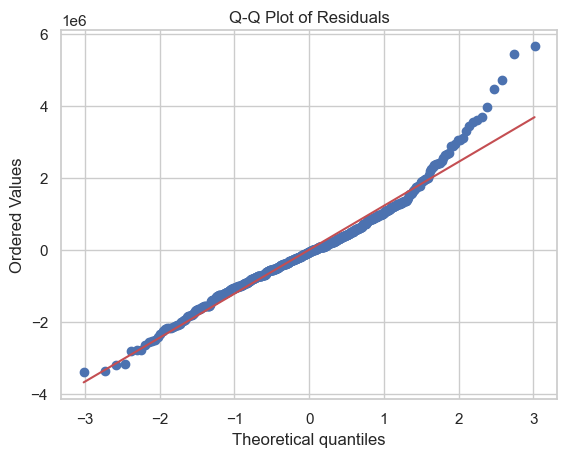

In [604]:
import scipy.stats as stats
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

# Or Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [606]:
str(df.columns)

"Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',\n       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',\n       'parking', 'prefarea', 'furnishingstatus', 'area_m2'],\n      dtype='object')"

In [608]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(columns=['price', 'area', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']).columns
vif_data["VIF"] = [variance_inflation_factor(X_const, i + 1) for i in range(X.shape[1])]

print(vif_data)


     feature       VIF
0   bedrooms  1.170959
1  bathrooms  1.316597
2    stories  1.252775
3    parking  1.255202
4    area_m2  1.164172


> ⚠️ Violating these assumptions doesn't always invalidate the model, but it can affect its interpretability, reliability, and inference.


![title](ML_03.pptx_3.png)